# Módulo 6 tarefa 3

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esse arquivo.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sinasc = pd.read_csv("b1abb33c4f.csv")

sinasc.head(3)

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


#### 2) Categorize a variável APGAR5 conforme as seguintes quebras:

- 0 a 3: 'asfixia grave'
- 4 a 5: 'asfixia moderada'
- 6 a 7: 'asfixia leve'
- 8 a 10: 'normal'

In [3]:
#sinasc['APGAR5'].dropna(inplace=True)

In [4]:
categ_list = ['asfixia grave', 'asfixia moderada', 'asfixia leve', 'normal']

series_categ = pd.cut(x=sinasc['APGAR5']
                      ,labels = categ_list
                      ,bins=[0,4,6,8,11]
                      ,right=False)

In [11]:
sinasc['APGAR5'] = series_categ
sinasc[['APGAR5']].head(2)

,APGAR5
0,normal
1,normal


#### 3) Monte um gráfico comparando a distribuição de APGAR5 por sexo para cada grupo de tempo de gestação (GESTACAO).

In [8]:
sinasc['GESTACAO'].unique()

array(['37 a 41 semanas', '42 semanas e mais', '32 a 36 semanas',
       '22 a 27 semanas', '28 a 31 semanas', nan, 'Menos de 22 semanas'],
      dtype=object)

In [9]:
gesta_unique = ['37 a 41 semanas', '42 semanas e mais', '32 a 36 semanas',
               '22 a 27 semanas', '28 a 31 semanas', 'Menos de 22 semanas']

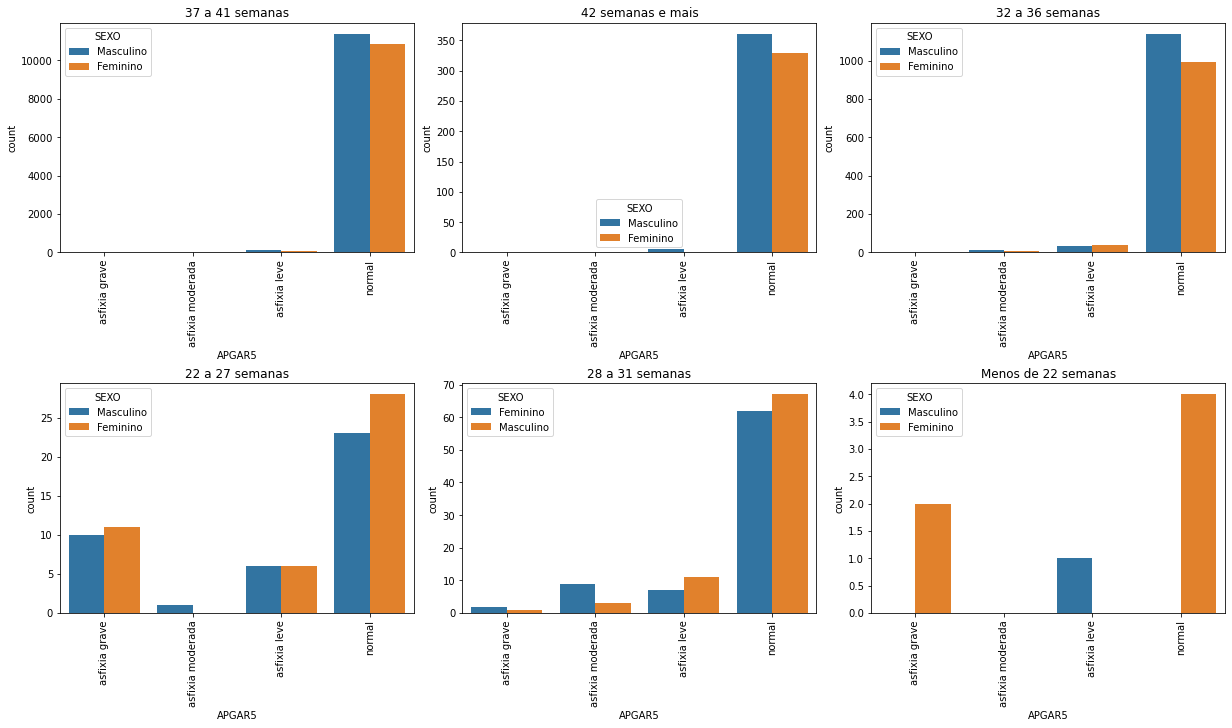

In [12]:
fig, ax = plt.subplots(2,3, figsize=(17,10), constrained_layout=True )

titulo = 0

for row in [0,1]:
    for colunm in [0,1,2]:
        sns.countplot(ax= ax[row,colunm]
        ,x='APGAR5'
        ,data=sinasc[sinasc['GESTACAO'] == gesta_unique[titulo]]
        ,hue='SEXO')
        ax[row,colunm].set_title(gesta_unique[titulo])
        ax[row,colunm].tick_params(axis='x', rotation=90)
        titulo = titulo + 1

        

####  4) Monte uma tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas

In [13]:
tab_cross = pd.crosstab(sinasc['APGAR5'], sinasc['GESTACAO'])
tab_cross

GESTACAO,22 a 27 semanas,28 a 31 semanas,32 a 36 semanas,37 a 41 semanas,42 semanas e mais,Menos de 22 semanas
APGAR5,,,,,,
asfixia grave,21,3,8,33,1,2
asfixia moderada,1,12,19,28,1,0
asfixia leve,12,18,73,196,6,1
normal,51,129,2134,22266,690,4


####  5) Da tabela cruzada do item anterior, calcule os percentuais de linha. Ou seja, a distribuição da variável APGAR5 para cada classe de GESTACAO dado.

In [14]:
f_relativa = tab_cross.div(tab_cross.sum(axis=1), axis=0)

In [15]:
f_relativa 

GESTACAO,22 a 27 semanas,28 a 31 semanas,32 a 36 semanas,37 a 41 semanas,42 semanas e mais,Menos de 22 semanas
APGAR5,,,,,,
asfixia grave,0.308824,0.044118,0.117647,0.485294,0.014706,0.029412
asfixia moderada,0.016393,0.196721,0.311475,0.459016,0.016393,0.000000
asfixia leve,0.039216,0.058824,0.238562,0.640523,0.019608,0.003268
normal,0.002018,0.005104,0.084435,0.880984,0.027301,0.000158


####  6) Os médicos costumam classificar parto prematuro quando a gestação tem menos que 37 semanas. Faça um gráfico de barras da tabela cruzada acima e conclua se você acha que este conjunto de dados corrobora ou não com a afirmação dos médicos.

<AxesSubplot:xlabel='APGAR5'>

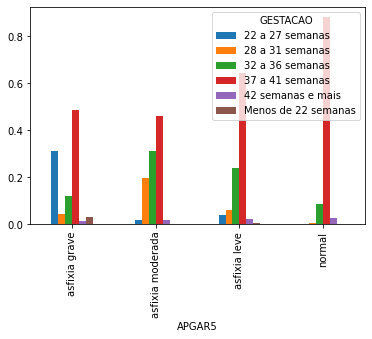

In [16]:
f_relativa.plot.bar()

De acordo com os dados, embora a predominância percentual relativa nos grupos normal à asifixia grave são de gestações entre 37 a 41 semanas(vermelho), há um decréscimo percentual dessa faixa à ordem das categorias do APGAR:

- Normal: 37 a 41 semanas -> quase 100% dos dados.
- Asfixia leve: 37 a 41 semanas -> 65% dos dados.
- Asfixia moderada: 37 a 41 semanas -> 45% dos dados.
- Asfixia grave: 37 a 41 semanas -> 48% dos dados.

Com isso, as gestações em até 36 semanas passam a ocupar espaço significativo nos grupos que ocorrem asfixia, logo, infere-se que bebês nascidos com 36 semanas ou menos podem correr maior risco de asfixia. 

Uma das causas da asfixia, segundo a pediatra Leila Denise Pereira, é o trabalho de parto prematuro, sendo até como um alerta de preparo para receber o bebê adequadamente. Conclui-se que os dados corroboram com a afirmação dos médicos.

A referência pode ser consultada em www.minhavida.com.br/amp/saude/temas/asfixia-perinatal



#### 7) Veja se há relação entre APGAR5 e o peso do bebê. Isso pode ser feito de diversas formas. Fique à vontade para escolher a melhor maneira na sua opinião, ou até testar mais de um dos gráficos que vimos. Fique à vontade também para consultar a documentação e utilizar algum outro recurso se achar conveniente.

<AxesSubplot:xlabel='APGAR5', ylabel='PESO'>

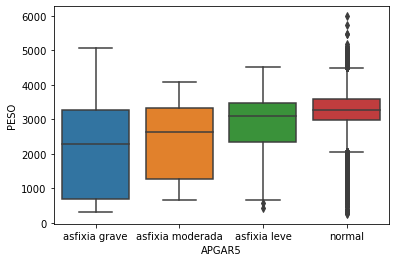

In [18]:
sns.boxplot(data=sinasc
           ,x='APGAR5'
           ,y='PESO'
           )